In [1]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

2024-08-12 04:09:24.424780: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-12 04:09:24.451214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 04:09:24.451257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 04:09:24.451924: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 04:09:24.456698: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

2024-08-12 04:09:26.014364: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-12 04:09:26.032354: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-12 04:09:26.032391: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [4]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [5]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [4]:
len(data)

81

In [5]:
data[0]

array([[[  25., -353.],
        [  87., -388.],
        [ 162., -464.]],

       [[  -5., -352.],
        [ -64., -345.],
        [ 116., -441.]],

       [[  23., -335.],
        [ -46., -315.],
        [  62., -425.]],

       [[  19., -334.],
        [ -27., -300.],
        [  70., -409.]],

       [[  -6., -326.],
        [-102., -307.],
        [ 113., -433.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]]])

In [12]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [13]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=1)
Y = np.delete(Y, 0, axis=1)

In [14]:
Y.shape

(81, 6, 3, 2)

In [15]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
X_test, Y_test = formating(X_test, Y_test)

In [16]:
X_test.shape

(102, 3, 2)

In [17]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
minimum_loss = float('inf')
for epoch in range(200):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)
        if loss < minimum_loss:
            minimum_loss = loss
            model.save('best.h5')
    l0.append(model.evaluate(X_test, Y_test))

2024-08-11 09:41:22.991411: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-11 09:41:22.991468: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-11 09:41:22.991485: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-11 09:41:23.165106: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-11 09:41:23.165152: I external/local_xla/xla/stream_executor

4/4 [==============================] - 0s 5ms/step - loss: 5274.1602


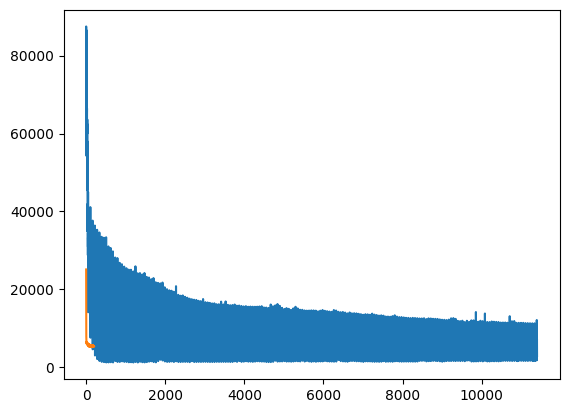

In [18]:
plt.plot(l)
plt.plot(l0)
plt.show()

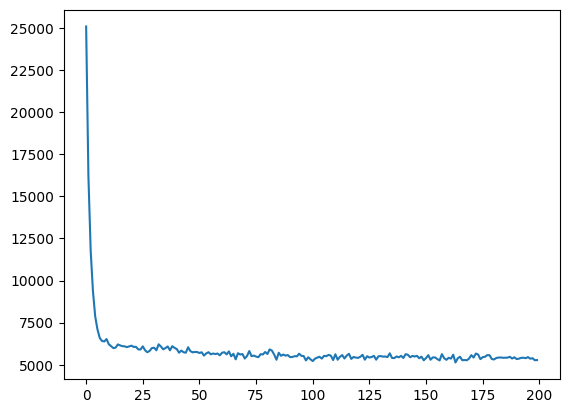

In [19]:
plt.plot(l0)

In [20]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

best epoch: 5131.72021484375 best batch: 1205.32666015625


In [23]:
l0[-1]

5274.16015625

In [28]:
model.save('last.h5')

/home/itachi/miniconda3/envs/kera/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
data[0]

array([[[  25., -353.],
        [  87., -388.],
        [ 162., -464.]],

       [[  -5., -352.],
        [ -64., -345.],
        [ 116., -441.]],

       [[  23., -335.],
        [ -46., -315.],
        [  62., -425.]],

       [[  19., -334.],
        [ -27., -300.],
        [  70., -409.]],

       [[  -6., -326.],
        [-102., -307.],
        [ 113., -433.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]]])

In [10]:
restore_changes(data[0],0)

[[[265.0, -113.0], [996.0, 521.0]],
 [[236.0, -111.0], [846.0, 565.0]],
 [[270.0, -88.0], [865.0, 596.0]],
 [[266.0, -87.0], [888.0, 615.0]],
 [[242.0, -78.0], [817.0, 612.0]],
 [[362.0, -122.0], [1092.0, 468.0]],
 [[362.0, -122.0], [1092.0, 468.0]]]

In [13]:
import cv2
img=cv2.imread('CutFrame_Output/output0/frame_0.png')
from utils import process_data
import re
from utils import list_change

data = process_data(r'CutFrame_Output/output0/use0.txt')
data1 = list_change(r'CutFrame_Output/output0/use0.txt')
print(data)
print(data1)
for p in data:
    # print((p[0], p[1]))
    cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)

for p in data1:
    # print((p[0], p[1]))
    cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)

cv2.imwrite('output.png', img)

[[265.0, 556.0], [327.0, 521.0], [402.0, 445.0], [240.0, 909.0]]
[[25.0, -353.0], [87.0, -388.0], [162.0, -464.0]]


True

In [6]:
restore_changes(data[0],0)

[[[265.0, 556.0], [327.0, 521.0], [402.0, 445.0]],
 [[236.0, 558.0], [177.0, 565.0], [357.0, 469.0]],
 [[270.0, 576.0], [201.0, 596.0], [309.0, 486.0]],
 [[266.0, 581.0], [220.0, 615.0], [317.0, 506.0]],
 [[242.0, 593.0], [146.0, 612.0], [361.0, 486.0]],
 [[362.0, 550.0], [420.0, 468.0], [418.0, 452.0]],
 [[362.0, 550.0], [420.0, 468.0], [418.0, 452.0]]]

In [8]:
model = tf.keras.models.load_model('last.h5')
a= model.predict(data[0]).tolist()

1/1 [==============================] - 0s 263ms/step


In [20]:
points = restore_changes(a,0)
points = ['pass']+points
del(points[-1])
for n,f in enumerate(points):
    if n==0:
        continue
    img = cv2.imread(f'./CutFrame_Output/output0/frame_{n}.png')
    for p in f:
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
    cv2.imwrite(f'outputs/output{n}.png', img)